# Lecture 4 - Introduction to PyTorch for Neural Networks

- [What is PyTorch?](#What-is-PyTorch?)
  - [Installing PyTorch](#Installing-PyTorch)
  - [Creating tensors in PyTorch](#Creating-tensors-in-PyTorch)
  - [Manipulating the data type and shape of a tensor](#Manipulating-the-data-type-and-shape-of-a-tensor)
  - [Applying mathematical operations to tensors](#Applying-mathematical-operations-to-tensors)
  - [Split, stack, and concatenate tensors](#Split,-stack,-and-concatenate-tensors)
- [Building input pipelines in PyTorch](#Building-input-pipelines-in-PyTorch)
  - [Basic linear regression model](#Basic-linear-regression-model)
  - [Model training via the torch.nn and torch.optim modules](#Model-training-via-the-torch.nn-and-torch.optim-modules)
- [Building a multilayer perceptron for classifying flowers in the Iris dataset](#Building-a-multilayer-perceptron-for-classifying-flowers-in-the-Iris-dataset)
  - [Evaluating the trained model on the test dataset](#Evaluating-the-trained-model-on-the-test-dataset)
- [Building a multilayer perceptron for classifying credit data of Lecture 1 and 2](#Building-a-multilayer-perceptron-for-classifying-credit-data-of-Lecture-1-and-2)
- [Choosing activation functions for multilayer neural networks](#Choosing-activation-functions-for-multilayer-neural-networks)
  - [Broadening the output spectrum using a hyperbolic tangent](#Broadening-the-output-spectrum-using-a-hyperbolic-tangent)
  - [Rectified linear unit activation](#Rectified-linear-unit-activation)
  - [Estimating class probabilities in multiclass classification via the softmax function](#Estimating-class-probabilities-in-multiclass-classification-via-the-softmax-function)

## What is PyTorch?

PyTorch is built around a computation graph composed of a set of nodes. Each node represents an
operation that may have zero or more inputs or outputs. PyTorch provides an imperative programming
environment that evaluates operations, executes computation, and returns concrete values
immediately. Hence, the computation graph in PyTorch is defined implicitly, rather than constructed
in advance and executed after.

Mathematically, tensors can be understood as a generalization of scalars, vectors, matrices, and so
on. More concretely, a scalar can be defined as a rank-0 tensor, a vector can be defined as a rank-1
tensor, a matrix can be defined as a rank-2 tensor, and matrices stacked in a third dimension can be
defined as rank-3 tensors. Tensors in PyTorch are similar to NumPy’s arrays, except that tensors are
optimized for automatic differentiation and can run on GPUs.

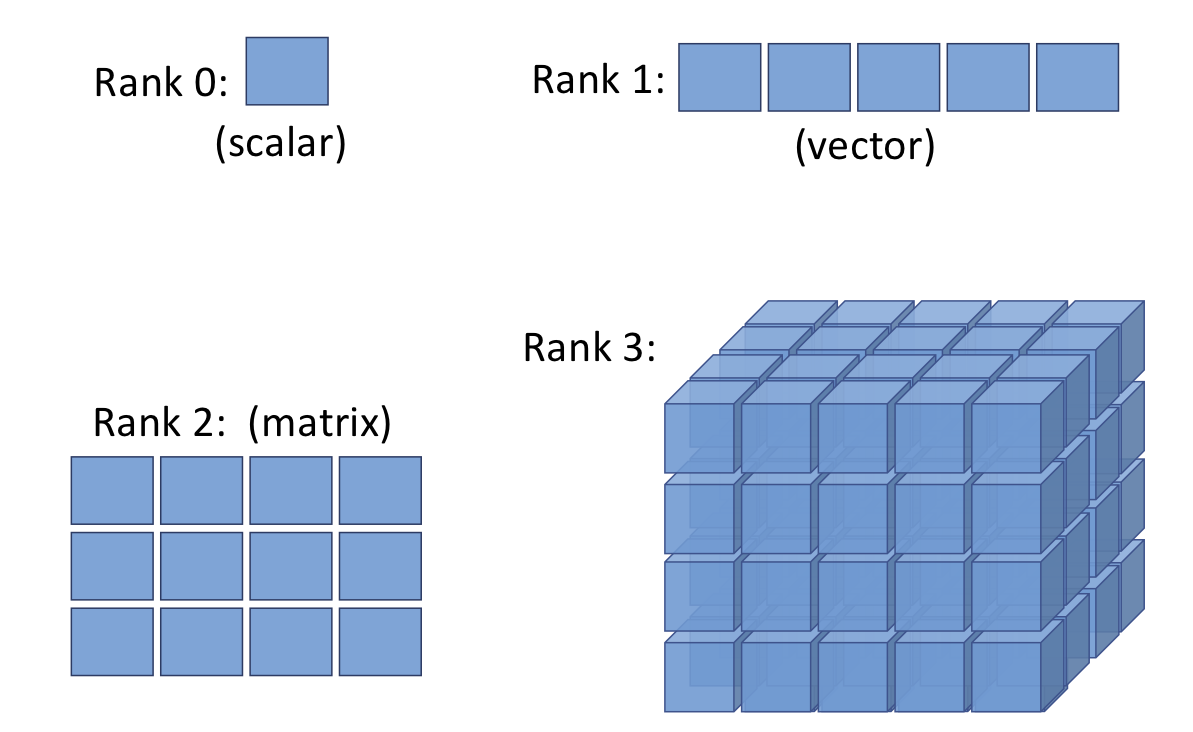

In [1]:
from IPython.display import Image as IPythonImage
%matplotlib inline
IPythonImage(filename='figures/12_02.png', width=500)

### Installing PyTorch

In [2]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 1.7.0


### Creating tensors in PyTorch

Create a tensor from a list or a NumPy array.

In [3]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [4]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [5]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


Create a tensor of random values.

In [6]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.6646, 0.6009, 0.3197],
        [0.9597, 0.5519, 0.1655]])


### Manipulating the data type and shape of a tensor

`torch.to()` function can be used to change the data type of a tensor to a desired type.

In [7]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


Transpose a tensor

In [8]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


Reshape a tensor

In [9]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


Removing unnecessary dimensions

In [10]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying mathematical operations to tensors

In [11]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [12]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [13]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


Matrix-matrix product between $t_1$ and $t_2$ (that is, $t_1 \times t_2^\top$) can be computed by using the `torch.matmul()` function

In [14]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [15]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


`torch.linalg.norm()` function is useful for computing the $L^p$ norm of a tensor. We compute the $L^2$ norm as:

In [16]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


Verify the calculation of the $L^2$ norm:

In [17]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### Split, stack, and concatenate tensors

`torch.chunk()` function divides an input tensor into a list of equally sized tensors using the `chunks` argument along the desired dimension specified by the `dim` argument.

In [18]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

Alternatively, we can provide the desired sizes in a list using the `torch.split()` function.

In [19]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
 
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

`torch.cat()` and `torch.stack()` can concatenate and stack the tensors, respectively.

In [20]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [21]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=0)
print(S)

tensor([[1., 1., 1.],
        [0., 0., 0.]])


## Building input pipelines in PyTorch

We train a deep NN model incrementally using an iterative optimization algorithm such as stochastic gradient descent. `torch.nn` is a module for building NN models.

In cases where the training dataset is rather small and can be loaded as a tensor into the memory, we can directly use this tensor for training. In typical use cases, however, when the dataset is too large to fit into the computer memory, we will need to load the data from the main storage device (for example, the hard drive or solid-state drive) in chunks, that is, batch by batch.

In addition, we may need to construct a data-processing pipeline to apply certain transformations and preprocessing steps to our data, such as mean centering, scaling, or adding noise to augment the training procedure and to prevent overfitting.

Applying preprocessing functions manually every time can be quite cumbersome. PyTorch
provides a special class for constructing efficient and convenient preprocessing pipelines.

### Creating a PyTorch DataLoader from existing tensors

It is easy to create a dataset loader using the torch.utils.data.DataLoader() class from a Python list or a NumPy array.

In [22]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [23]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


We can create batches from this dataset, with a desired batch size of 3 with the
`batch_size` argument.

In [24]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


The optional `drop_last` argument is useful for cases when the number of elements in the tensor is not divisible by the desired batch size. We can drop the last non-full batch by setting `drop_last` to `True`. The default value for `drop_last` is `False`.

`DataLoader` provides a convenient, automatic and customizable batching to iterate over a dataset.

### Combining two tensors into a joint dataset

Often, we may have the data in two (or possibly more) tensors. For example, we could have a tensor
for features and a tensor for labels. In such cases, we need to build a dataset that combines these
tensors, which will allow us to retrieve the elements of these tensors in tuples.

In [25]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

Assume that we have two tensors,`t_x` and `t_y`. Tensor `t_x` holds our feature values, each of size 3, and `t_y` stores the class labels.

In [26]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


### Shuffle, batch, and repeat

It is important to feed training data as randomly shuffled batches when training an NN model using stochastic gradient descent optimization.

In [27]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])
epoch 1
batch 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([1, 2])
batch 2: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([3, 0])
epoch 2
batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


## Building a neural network model in PyTorch

Before building our first predictive model in PyTorch, we start with a simple linear regression model. To fully utilize the power of the `torch.nn` module and customize it for our problem, we need to understand what it’s doing. 

To develop this understanding, we first train a basic linear regression model on a toy dataset without using any features from the `torch.nn` module. Then, we incrementally add features from `torch.nn` and torch.optim. We will see that these modules make building an NN model extremely easy. 

- The most commonly used approach for building an NN in PyTorch is through `nn.Module`, which allows layers to be stacked to form a network. This gives us more control over the forward pass.

### Basic linear regression model

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

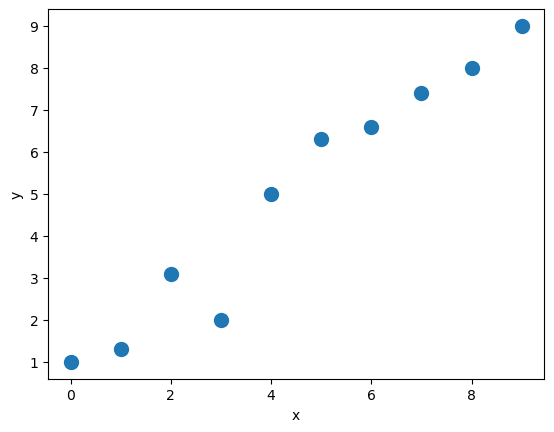

In [29]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Next, we standardize the features and create a PyTorch Dataset for the training set and a corresponding DataLoader.

In [30]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Next, we define our linear regression model $z = wx + b$ using the `torch.nn` module. We define the parameters of our model, `weight` and `bias`, which correspond to the weight and the bias parameters, respectively. Finally, we will define the `model()` function to determine how this model uses the input data to generate its output.

After defining the model, we define the loss function that we want to minimize to find the optimal model weights. Here, we choose the mean squared error (MSE) as our loss function.

In [31]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_() 
bias = torch.zeros(1, requires_grad=True) # notice another way to set requires_grad
 
def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
 
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')
 

C:\Users\aa261w\Anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Epoch 0  Loss 5.1701
Epoch 10  Loss 30.3370
Epoch 20  Loss 26.9436
Epoch 30  Loss 0.9315
Epoch 40  Loss 3.5942
Epoch 50  Loss 5.8960
Epoch 60  Loss 3.7567
Epoch 70  Loss 1.5877
Epoch 80  Loss 0.6213
Epoch 90  Loss 1.5596
Epoch 100  Loss 0.2583
Epoch 110  Loss 0.6957
Epoch 120  Loss 0.2659
Epoch 130  Loss 0.1615
Epoch 140  Loss 0.6025
Epoch 150  Loss 0.0639
Epoch 160  Loss 0.1177
Epoch 170  Loss 0.3501
Epoch 180  Loss 0.3281
Epoch 190  Loss 0.0970


To learn the weight parameters of the model, we implement the stochastic gradient descent procedure by ourselves, but we could also directly use the SGD method from the optimization package, `torch.optim`, to do the same thing. 

To implement the stochastic gradient descent algorithm, we need to compute the gradients. Rather than manually computing the gradients, we will use PyTorch’s `torch.autograd.backward` function.

- `loss.backward()` computes the gradient of the loss function with respect to model parameters
- `weight.grad` stores the partial derivative with respect to `weight`
- `bias.grad` stores the partial derivative with respect to `bias`
- `weight.grad.zero_()` sets the gradient to zero otherwise it gets accumulated (default status) in every call of `loss.backward()` 
- using `torch.no_grad()` is just a good practice to make sure you do not end up computing gradient of the loss function again when performing computations

Next, we look at the trained model and plot it. Since we trained our model with standardized features, we also apply the same standardization to the test data to plot the linear regression line.

Final Parameters: 2.669806480407715 4.879569053649902


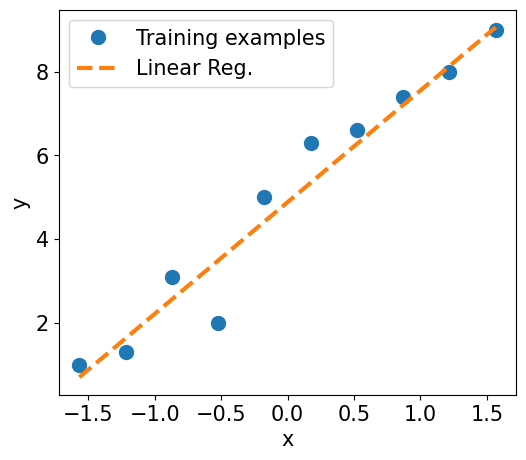

In [32]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Model training via the torch.nn and torch.optim modules

`torch.nn` module provides a set of loss functions, and `torch.optim` supports most commonly used optimization algorithms that can be called to update the parameters based on the computed gradients.

We use `torch.nn.Linear` class for the linear layer instead of manually defining it.

Call the `step()` method of the optimizer to train the model by passing a batched dataset.

In [33]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0] 

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 38.7543
Epoch 10  Loss 2.0970
Epoch 20  Loss 30.4347
Epoch 30  Loss 0.7147
Epoch 40  Loss 13.1391
Epoch 50  Loss 6.6279
Epoch 60  Loss 4.2347
Epoch 70  Loss 4.7506
Epoch 80  Loss 1.1948
Epoch 90  Loss 1.4845
Epoch 100  Loss 0.2175
Epoch 110  Loss 1.0143
Epoch 120  Loss 0.1618
Epoch 130  Loss 0.7065
Epoch 140  Loss 1.4043
Epoch 150  Loss 0.0693
Epoch 160  Loss 0.2174
Epoch 170  Loss 0.0928
Epoch 180  Loss 0.0979
Epoch 190  Loss 0.0005


Verify the final parameters are the same as before using our own defined regression function.

In [34]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6650238037109375 4.877845287322998


## Building a multilayer perceptron for classifying flowers in the Iris dataset

PyTorch provides already defined layers through `torch.nn` that can be readily used as the building blocks of an NN model. Let us use these layers to solve a classification task using the Iris flower dataset (identifying between three species of irises) and build a two-layer perceptron using the `torch.nn` module.

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

We randomly select 100 samples (2/3) for training and 50 samples (1/3) for testing. Next, we standardize the features (mean centering and dividing by the standard deviation) and create
a PyTorch Dataset for the training set and a corresponding `DataLoader`.

In [36]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Here, we set the batch size to 2 for the DataLoader.

Using the `nn.Module` class, we can stack a few layers and build an NN.

In [37]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size) # input layer
        self.layer2 = nn.Linear(hidden_size, output_size) # hidden layer

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x) # Note the use of softmax instead of argmax
        return x
    
input_size = X_train_norm.shape[1] # number of features in the dataset
hidden_size = 16 # hidden layer has 16 neurons
output_size = 3 # same as the number of classes in the dataset
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss() # Note the use of cross-entropy loss instead of MSE
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

The Adam optimizer is the most popular robust, gradient-based optimization method. We will not discuss the details of it in this course.

In [38]:
num_epochs = 100
loss_hist = [0] * num_epochs # list of size num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward() # computes the gradient using backpropagation
        optimizer.step() # performs the parameter update
        optimizer.zero_grad() # make the derivatives zero again for the next iteration
    
        loss_hist[epoch] += loss.item()*y_batch.size(0) # compute the loss
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

`loss_hist` and `accuracy_hist` lists keep the training loss and the training accuracy after each
epoch.

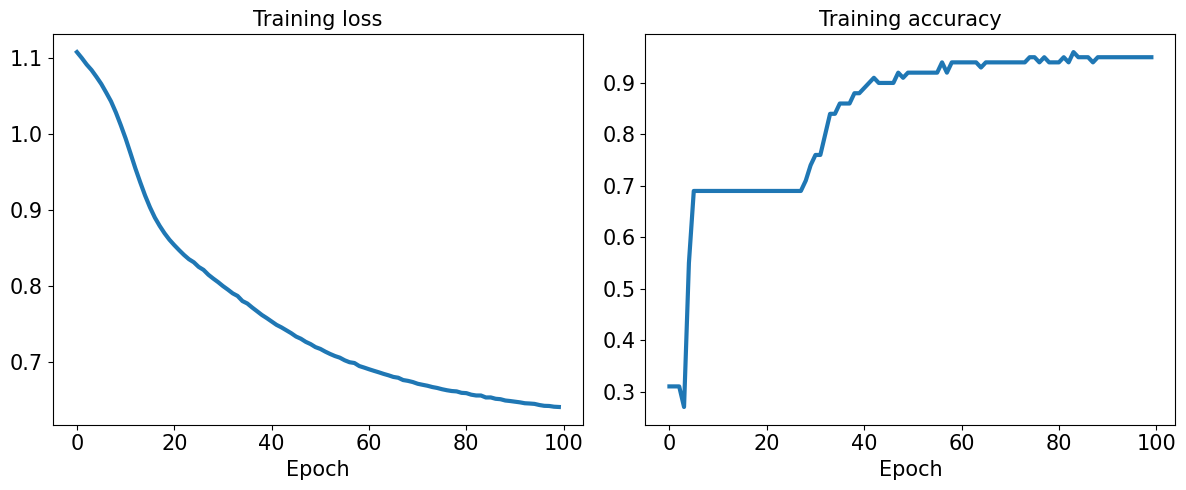

In [39]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

### Evaluating the trained model on the test dataset

In [40]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


## Building a multilayer perceptron for classifying credit data of Lecture 1 and 2

In [41]:
import os
import pandas as pd
import numpy as np
s = 'https://github.com/agarwalankush/ECON5130/blob/main/lecture2/CreditData.data?raw=true'
print('From URL:', s)
df = pd.read_csv(s, header=None,encoding='utf-8', on_bad_lines='skip')

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1, stratify=y)

From URL: https://github.com/agarwalankush/ECON5130/blob/main/lecture2/CreditData.data?raw=true


In [42]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [43]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size) # input layer
        self.layer2 = nn.Linear(hidden_size, output_size) # hidden layer

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1] 
hidden_size = 64
output_size = 3

learning_rate = 0.01

loss_fn = nn.CrossEntropyLoss() # Note the use of cross-entropy loss instead of MSE
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [44]:
num_epochs = 200
loss_hist = [0] * num_epochs # list of size num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward() # computes the gradient using backpropagation
        optimizer.step() # performs the parameter update
        optimizer.zero_grad() # make the derivatives zero again for the next iteration
    
        loss_hist[epoch] += loss.item()*y_batch.size(0) # compute the loss
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

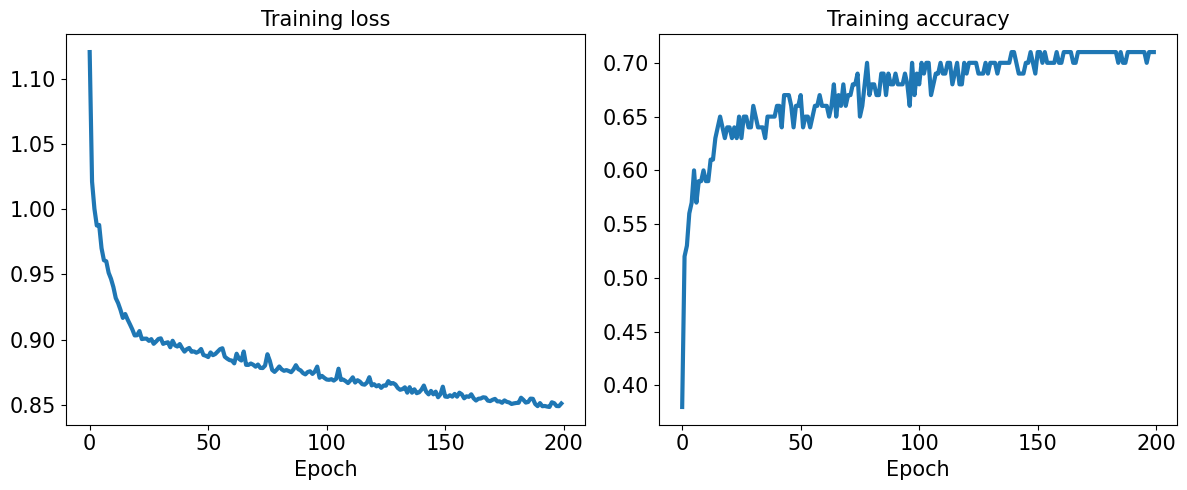

In [45]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [46]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.7000


## Choosing activation functions for multilayer neural networks

### Broadening the output spectrum using a hyperbolic tangent

The logistic (sigmoid) activation function can be problematic if we have highly negative input, since
the output of the sigmoid function will be close to zero in this case. If the sigmoid function returns
output that is close to zero, the NN will learn very slowly, and it will be more likely to get trapped in the local minima of the loss landscape during training. This is why people often prefer a hyperbolic tangent as an activation function in hidden layers.

It can be interpreted as a rescaled version of the logistic function:
\begin{align}
\sigma_{logistic}(z) &= \frac{1}{1 + e^{-z}}\\
\sigma_{tanh}(z) &= 2 \times \sigma_{logistic}(2z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}.
\end{align}

The advantage of the hyperbolic tangent over the logistic function is that it has a broader output
spectrum ranging in the open interval (–1, 1), which can improve the convergence of the backpropagation algorithm.

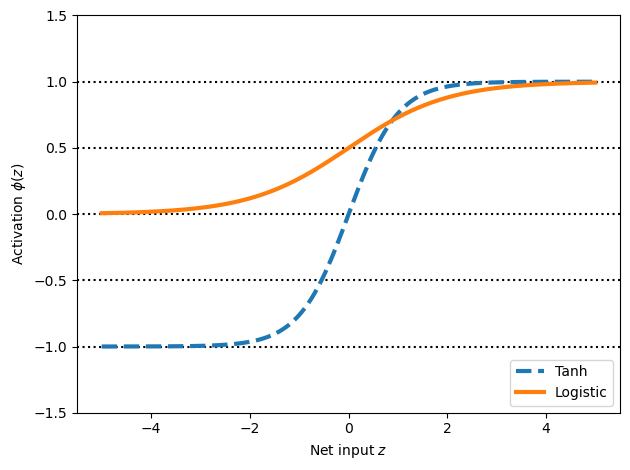

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

### Rectified linear unit activation

The rectified linear unit (ReLU) is another activation function that is often used in deep NNs. The derivative of logistic (sigmoid) and hyperbolic tangent activation functions with respect to the net input diminishes as $z$ becomes large.

As a result, learning the weights during the training phase becomes very slow because the gradient
terms may be very close to zero. ReLU activation addresses this issue. Mathematically, ReLU is
defined as follows:
\begin{align}
\sigma(z) = \max(0, z).
\end{align}

ReLU is still a nonlinear function that is good for learning complex functions with NNs. Besides this,
the derivative of ReLU, with respect to its input, is always 1 for positive input values. Therefore, it solves the problem of vanishing gradients, making it suitable for deep NNs.

In [48]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

In [49]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [50]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

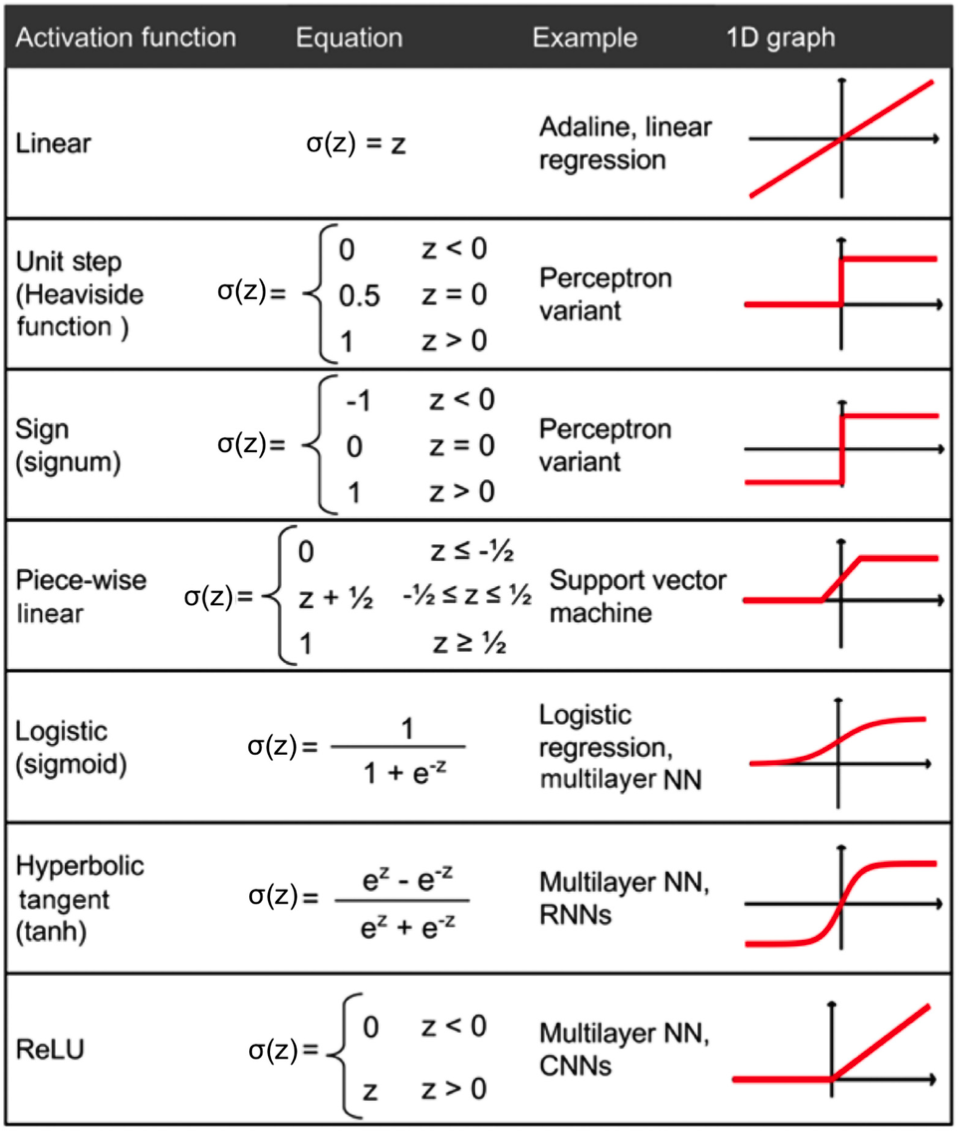

In [51]:
IPythonImage(filename='figures/12_11.png', width=500)

### Estimating class probabilities in multiclass classification via the softmax function

The `softmax` function is a soft form of the `argmax` function; instead of giving a single class index, it provides the probability of each class. Therefore, it allows us to compute meaningful class probabilities in multiclass settings (multinomial logistic regression).

In `softmax`, the probability of a particular sample with net input $z$ belonging to the $i$th class can be computed with a normalization term in the denominator, that is, the sum of the exponentially weighted linear functions:
\begin{align}
p(z) = \sigma(z) = \frac{e^{z_i}}{\sum^M_{j=1}e^{z_j}}.
\end{align}

In [52]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

print('Output Units:\n', y_probas) 

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.856 0.681 0.839]


In [53]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class) 

Predicted class label: 0


In [54]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

np.sum(y_probas)

Probabilities:
 [0.447 0.161 0.392]


1.0

It is also notable that the predicted class label is the same as when we applied the `argmax` function to the logistic output.

In [55]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

## Simplifying implementations of common architectures via the torch.nn module

### Implementing models based on nn.Sequential

With `nn.Sequential`, the layers stored inside the model are connected in a cascaded way. We build a model with two densely (fully) connected layers:

In [88]:
import os
import pandas as pd
import numpy as np
s = 'https://github.com/agarwalankush/ECON5130/blob/main/lecture2/CreditData.data?raw=true'
print('From URL:', s)
df = pd.read_csv(s, header=None,encoding='utf-8', on_bad_lines='skip')

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1, stratify=y)

From URL: https://github.com/agarwalankush/ECON5130/blob/main/lecture2/CreditData.data?raw=true


In [89]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [90]:
input_size = X_train_norm.shape[1] 
hidden_size = 64
output_size = 3

learning_rate = 0.01

model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(), nn.Linear(hidden_size, output_size), 
                      nn.ReLU())
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

The output of the first fully connected layer is used as the input to the first ReLU layer. The output of the first ReLU layer becomes the input for the second fully connected layer. Finally, the output of the second fully connected layer is used as the input to the second ReLU layer.

In [ ]:
num_epochs = 200
loss_hist = [0] * num_epochs # list of size num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward() # computes the gradient using backpropagation
        optimizer.step() # performs the parameter update
        optimizer.zero_grad() # make the derivatives zero again for the next iteration
    
        loss_hist[epoch] += loss.item()
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

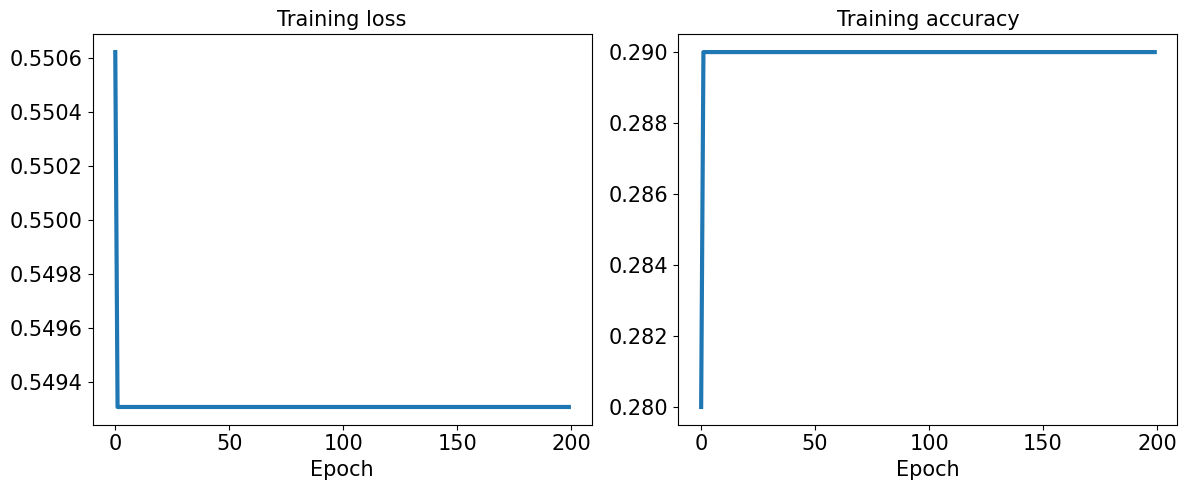

In [85]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [86]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.2800
